In [1]:
#Importing the library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
data = 'C:/Users/HP/Documents/workspace/Ml-opzoomcamp/housing.csv'
df = pd.read_csv(data)

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Preparation

In [4]:
#structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#shape of the data(row, columns)
df.shape

(20640, 10)

In [7]:
#features in the data
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS


In [8]:
#exploring the columns and unique features in the data
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print (df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5



<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

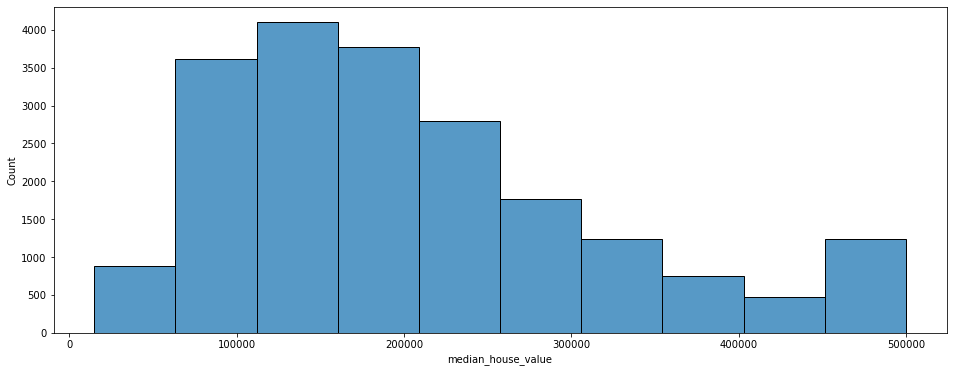

In [9]:
fig= plt.figure(figsize=(16,6))
sns.histplot(df['median_house_value'], bins=10)

**The plot above shows a long tail in the feature median_house_value.**

In [10]:
df['median_house_value'].max()

500001.0

In [11]:
df['median_house_value'].min()

14999.0

In [12]:
#selecting features
del df['ocean_proximity']
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# Question 1
Find a feature with missing values. How many missing values does it have?

In [13]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Feature total_bedrooms has 207 missing values**

# Question 2
What's the median (50% percentile) for variable 'population'?

- **1133**


- **1122**


- **1166**


- **1188**




# **Split the data**

- **Shuffle the initial dataset, use seed 42.**


- **Split your data in train/val/test sets, with 60%/20%/20% distribution.**


- **Make sure that the target value ('median_house_value') is not in your dataframe.**


- **Apply the log transformation to the median_house_value variable using the np.log1p() function.**

In [14]:
int(df['population'].median())

1166

# Setting up the validation Framework

In [22]:
#spliting the data frame in to train, test, val.
n = len(df)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

print("The size of train data is: ", n_train)
print("The size of validtion data is: ", n_val)
print("The size of test data is: ", n_test)


The size of train data is:  12384
The size of validtion data is:  4128
The size of test data is:  4128


In [19]:
#subsetting the dataset
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [20]:
#shuffling the dataset and setting a seed of 42
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [23]:
#subsetting & reshuffling the dataset
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [24]:
#resetting the index
df_train = df_train.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)
df_test = df_test.reset_index(drop= True)

In [25]:
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0
1,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0
2,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0
3,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0
4,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0
...,...,...,...,...,...,...,...,...,...
4123,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
4124,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
4125,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
4126,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [26]:
#setting the predictor or output variable
y_train_tran = df_train.median_house_value.values
y_val_tran =  df_val.median_house_value.values
y_test_tran = df_test.median_house_value.values

In [27]:
#transforming the target variable
y_train = np.log1p(y_train_tran)
y_val = np.log1p(y_val_tran)
y_test = np.log1p(y_test_tran)

In [28]:
#dropping the predictor variable from the dataset to make it a target variable x
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [29]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
12379,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327
12380,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798
12381,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
12382,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566


# Question 3
- **We need to deal with missing values for the column from Q1.**


- **We have two options: fill it with 0 or with the mean of this variable.**


- **Try both options. For each, train a linear regression model without regularization using the code from the lessons.**


- **For computing the mean, use the training only!**


- **Use the validation dataset to evaluate the models and compare the RMSE of each option.**


- **Round the RMSE scores to 2 decimal digits using round(score, 2)**


- **Which option gives better RMSE?**


- **Options:**


- **With 0**


- **With mean**


- **With median**


- **Both are equally good**

In [30]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [31]:
#selecting the features to make predictions
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [32]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [33]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

In [35]:
#fillna with zero(0)
def prepare_X1(df):
    df_num1 = df[base]
    df_num1 = df_num1.fillna(0)
    X1 = df_num1.values
    return X1

# Filling the missing value with mean

In [41]:
#fillna with mean
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

#training the model
X_train =  prepare_X(df_train)
X_train
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
print('train:',  np.round(rmse(y_train, y_pred), 2))

#evaluating the model with val dataset
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation:', np.round(rmse(y_val, y_pred), 2))

train: 0.34
validation: 0.33


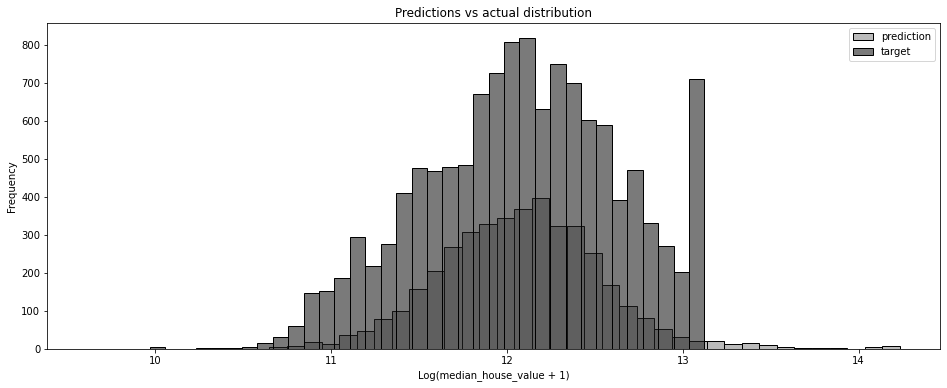

In [38]:
plt.figure(figsize=(16, 6))

sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(median_house_value + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [42]:
#fillna with zero(0)
def prepare_X1(df):
    df_num1 = df[base]
    df_num1 = df_num1.fillna(0)
    X1 = df_num1.values
    return X1

X_train =  prepare_X1(df_train)
X_train
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
print('train:',  np.round(rmse(y_train, y_pred), 2))


X_val = prepare_X1(df_val)
y_pred = w0 + X_val.dot(w)
print('validation:', np.round(rmse(y_val, y_pred), 2))

train: 0.34
validation: 0.33


**Both are equally good**

# Question 4
- **Now let's train a regularized linear regression.**


- **For this question, fill the NAs with 0.**


- **Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].**


- **Use RMSE to evaluate the model on the validation dataset.**


- **Round the RMSE scores to 2 decimal digits.**


- **Which r gives the best RMSE?**


- **If there are multiple options, select the smallest r.**


**Options:**


- **0**


- **0.000001**


- **0.001**


- **0.01**

In [43]:
#regularized linear reg
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [44]:
X_train =  prepare_X1(df_train)

In [45]:
#training the dataset
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X1(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_pred),2)
    print(r, w0, rmse_val)

0 -11.686975241970226 0.33
1e-06 -11.686959175950335 0.33
0.0001 -11.68536886556655 0.33
0.001 -11.670931318286257 0.33
0.01 -11.528493586076086 0.33
0.1 -10.274500282121712 0.33
1 -4.920480897796898 0.33
5 -1.482095745685135 0.34
10 -0.7899311832050503 0.34


**0 gave is the smallest rmse**

# Question 5

- **We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.**


- **Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].**


- **For each seed, do the train/validation/test split with 60%/20%/20% distribution.**


- **Fill the missing values with 0 and train a model without regularization.**


- **For each seed, evaluate the model on the validation dataset and collect the RMSE scores.**


- **What's the standard deviation of all the scores? To compute the standard deviation, use np.std.**


- **Round the result to 3 decimal digits (round(std, 3))**


****Options:**


- **0.5**


- **0.05**


- **0.005**


- **0.0005**

In [46]:
#creating an empty list
rmse_list = []

#looping through the seeds s
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    #shuffling the data
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    #subsetting and reshuffling the data
    df_train =df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()
    
    #resetting index
    df_train = df_train.reset_index(drop= True)
    df_val = df_val.reset_index(drop= True)
    df_test = df_test.reset_index(drop= True)
    
    #setting the output variable 
    y_train_tran = df_train.median_house_value.values
    y_val_tran =  df_val.median_house_value.values
    y_test_tran = df_test.median_house_value.values

    #transforming the target vriable using
    y_train = np.log1p(y_train_tran)
    y_val = np.log1p(y_val_tran)
    y_test = np.log1p(y_test_tran)
    
    
    #deleting the pred variable from the train variable
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    #fillna with o
    X_train =  prepare_X1(df_train)
    X_train
    
    #training the dataset without regularization
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_train.dot(w)

    X_val = prepare_X1(df_val)
    y_pred = w0 + X_val.dot(w)

    rmse_val = np.round(rmse(y_val, y_pred),2)
    
    rmse_list.append(rmse_val)

    print(s, w0, rmse_val)

0 -11.900382138067279 0.34
1 -11.732757373265155 0.34
2 -11.806729361023445 0.33
3 -11.587900347934326 0.34
4 -11.389470588610251 0.34
5 -11.447114275982313 0.34
6 -11.370516352090455 0.35
7 -12.473448918095002 0.34
8 -11.800287429474718 0.35
9 -11.459046830677947 0.34


In [47]:
rmse_list

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

In [48]:
np.round(np.std(rmse_list),3)

0.005

# Question 6

- **Split the dataset like previously, use seed 9.**


- **Combine train and validation datasets.**


- **Fill the missing values with 0 and train a model with r=0.001.**


- **What's the RMSE on the test dataset?**


**Options:**

- **0.35**


- **0.035**


- **0.45**


- **0.045**

In [51]:
#spliting the data frame in to train, test, val.
n = len(df)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

#setting a seed of 9 and shuffling the data
r = 9
idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]


#subsetting & reshuffling the data
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

#getting out output variable
y_train_tran = df_train.median_house_value.values
y_val_tran =  df_val.median_house_value.values
y_test_tran = df_test.median_house_value.values

#transforming the output variable
y_train = np.log1p(y_train_tran)
y_val = np.log1p(y_val_tran)
y_test = np.log1p(y_test_tran)


#deletinf the output variable to get the input variable
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


#concatenating the train & val data
new_features = [df_train,df_val ]
df_train_val = pd.concat(new_features)


#resetting the index of train & val
df_train_val = df_train_val.reset_index(drop= True)


#concatenating the numpy output variable y of train and val.
y_train_val = np.concatenate([y_train, y_val])


#training the concatenated dataframe of train and val
x_train_val = prepare_X1(df_train_val)
w0, w = train_linear_regression_reg(x_train_val, y_train_val, r=0.001)

#evaluating the model on the test dataframe.
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
print('test:', np.round(rmse(y_test, y_pred),2))

test: 0.35
